In [1711]:
# firstly  we have to Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [1712]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)




In [1713]:
import pandas as pd
import seaborn as sns
import numpy as np
df_train = pd.read_csv("train.csv")
df_to_predict = pd.read_csv("test.csv")
df_to_predict.shape

(36000, 9)

In [1714]:
df_train.tail(10)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
512077,548018,873,600,Software Marketing,Program,0,0,1,11739,0.07,144
512078,548019,874,600,Software Marketing,Program,0,0,1,10311,0.07,133
512079,548020,875,600,Software Marketing,Program,0,1,1,9429,0.07,114
512080,548021,876,600,Software Marketing,Program,0,0,1,9639,0.07,121
512081,548022,877,600,Software Marketing,Program,0,0,1,9072,0.07,111
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.07,114
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.07,145
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.07,167
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.07,107
512086,548027,882,600,Software Marketing,Program,1,0,1,11445,0.07,152


In [1715]:
df_train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [1716]:
# hey buddy we have to Check for null values in the dataset
df_train.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [1717]:
print("Number of rows in training dataset",df_train.shape)
print("Number of rows in prediction dataset",df_to_predict.shape)
print(df_train.head(0))
print(df_to_predict.head(0))

Number of rows in training dataset (512087, 11)
Number of rows in prediction dataset (36000, 9)
Empty DataFrame
Columns: [ID, Day_No, Course_ID, Course_Domain, Course_Type, Short_Promotion, Public_Holiday, Long_Promotion, User_Traffic, Competition_Metric, Sales]
Index: []
Empty DataFrame
Columns: [ID, Day_No, Course_ID, Course_Domain, Course_Type, Short_Promotion, Public_Holiday, Long_Promotion, Competition_Metric]
Index: []


In [1718]:
#hey  now lets check null column values
null_columns=df_train.columns[df_train.isnull().any()]
print(df_train[df_train.isnull().any(axis=1)][null_columns].head(10))


null_columns=df_to_predict.columns[df_to_predict.isnull().any()]
print(df_to_predict[df_to_predict.isnull().any(axis=1)][null_columns].head(10))


        Competition_Metric
149014                 NaN
149015                 NaN
149016                 NaN
149017                 NaN
149018                 NaN
149019                 NaN
149020                 NaN
149021                 NaN
149022                 NaN
149023                 NaN
       Competition_Metric
10500                 NaN
10501                 NaN
10502                 NaN
10503                 NaN
10504                 NaN
10505                 NaN
10506                 NaN
10507                 NaN
10508                 NaN
10509                 NaN


In [1719]:
df_train.size
df_to_predict.shape

(36000, 9)

In [1720]:
# #  now drop null column values
# df_train.dropna(inplace=True)

# df_to_predict.dropna(inplace=True)
# df_to_predict.size

In [1721]:
df_train['Competition_Metric'].fillna((df_train['Competition_Metric'].mean()), inplace=True)


df_to_predict['Competition_Metric'].fillna((df_to_predict['Competition_Metric'].mean()), inplace=True)

df_to_predict.shape

(36000, 9)

In [1722]:
#324000-322920

In [1723]:
# we are going to select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df_train[df_train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF.shape)




duplicateRowsDF1 = df_to_predict[df_to_predict.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF1.shape


Total Duplicate Rows except first occurrence based on all columns are :
(0, 11)
Total Duplicate Rows except first occurrence based on all columns are :


(0, 9)

In [1724]:
print(df_train.isnull().sum())

print(df_to_predict.isnull().sum())

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
Sales                 0
dtype: int64
ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
Competition_Metric    0
dtype: int64


In [1725]:
df_to_predict.size

324000

In [1726]:
# well  now clerly remove duplicate rows in training dataset
#df_train.drop_duplicates(keep='first',inplace=True)



#df_to_predict.drop_duplicates(keep='first',inplace=True)

In [1727]:
#HEY  lets See values in columns of dataset 
df_to_predict.size

324000

In [1728]:
pd.set_option('display.max_columns',None)
df_train.head()


,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


# cleaning

In [1729]:
df_to_predict["Course_Domain"].value_counts()




Development             18480
Software Marketing      11880
Finance & Accounting     5340
Business                  300
Name: Course_Domain, dtype: int64

In [1730]:
df_train.Course_Domain.replace(['Development','Software Marketing','Finance & Accounting','Business'], [0,1,2,3], inplace=True)
df_to_predict.Course_Domain.replace(['Development','Software Marketing','Finance & Accounting','Business'], [0,1,2,3], inplace=True)
df_train["Course_Domain"] = df_train["Course_Domain"].astype(int)
df_to_predict["Course_Domain"] = df_to_predict["Course_Domain"].astype(int)


In [1731]:
df_train["Course_Domain"].value_counts()


0    264295
1    166172
2     77210
3      4410
Name: Course_Domain, dtype: int64

In [1732]:
print(df_to_predict["Day_No"].value_counts().size)
print(df_to_predict["Day_No"].value_counts().head()
     )
#print(df_to_predict["ID"].value_counts())

60
927    600
895    600
941    600
909    600
940    600
Name: Day_No, dtype: int64


In [1733]:
df_to_predict["Course_ID"].value_counts().size
print(df_to_predict["Course_ID"].value_counts().head())

575    60
522    60
458    60
426    60
394    60
Name: Course_ID, dtype: int64


In [1734]:
print(df_to_predict["Course_Domain"].value_counts().head().size)
print(df_to_predict["Course_Domain"].value_counts().head())

4
0    18480
1    11880
2     5340
3      300
Name: Course_Domain, dtype: int64


In [1735]:
df_train.Course_Type.replace(['Course','Program','Degree'], [0,1,2], inplace=True)
df_to_predict.Course_Type.replace(['Course','Program','Degree'], [0,1,2], inplace=True)
df_train["Course_Type"] = df_train["Course_Type"].astype(int)
df_to_predict["Course_Type"] = df_to_predict["Course_Type"].astype(int)


In [1736]:
# df_train["Course_Type"].value_counts().head()

In [1737]:
df_train["ID"].value_counts().size

512087

In [1738]:
########################################################3

#df_train=df_train.drop(['ID','User_Traffic','Public_Holiday'],axis=1)
#User_Traffic
#df_train=df_train.drop(['ID','User_Traffic'],axis=1)
#df_to_predict=df_to_predict.drop(['ID'],axis=1)
df_train=df_train.drop(['ID','User_Traffic','Competition_Metric','Day_No'],axis=1)


In [1739]:
print("Number of rows in training dataset",df_train.shape)
print("Number of rows in prediction dataset",df_to_predict.shape)

Number of rows in training dataset (512087, 8)
Number of rows in prediction dataset (36000, 9)


In [1740]:
# df_train["Course_Type"].value_counts().size

# df_to_predict["Course_Type"].value_counts().size

In [1741]:
df_train["Short_Promotion"].value_counts().size

df_to_predict["Short_Promotion"].value_counts().size

2

In [1742]:
# df_train["Public_Holiday"].value_counts().size

# df_to_predict["Public_Holiday"].value_counts().size

In [1743]:
# df_train["Long_Promotion"].value_counts().size

# df_to_predict["Long_Promotion"].value_counts().size

In [1744]:
df_train["Sales"].value_counts().size# but we sholud not eleminate this bro hsshahhahaah


#df_to_predict["Sales"].value_counts().size


544

In [1745]:
# We created X and y columns for training dataset while y column for dataset to predict will
# be generated by our model in final step
X = df_train.drop(["Sales"], axis=1)
#y = np.log1p(df_train['Infect_prob'])
y = df_train["Sales"]
X_to_predict = df_to_predict
X.head()
X_to_predict.head()
#print(df_to_predict["Day_No"].value_counts())
X.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion
0,1,1,0,0,0,1,1
1,2,1,0,0,0,0,1
2,3,1,0,0,0,0,1
3,4,1,0,0,0,0,1
4,5,1,0,0,0,0,1


In [1746]:
y.head()

0    81
1    79
2    75
3    80
4    41
Name: Sales, dtype: int64

In [1747]:
#Separate categorical and numerical columns in dataframe
X_categorical = X.select_dtypes(exclude=['int', 'float'])
X_numerical = X.select_dtypes(include=['int', 'float'])

X_to_predict_categorical = X_to_predict.select_dtypes(exclude=['int', 'float'])
X_to_predict_numerical = X_to_predict.select_dtypes(include=['int', 'float'])

In [1748]:
# Check if categorical columns are assigned properly
print(X_categorical.head())

#Create a back up copy specifically for plotting graphs
X_numerical_graph = X_numerical.copy()
X_categorical_graph = X_categorical.copy()

   Day_No  Course_ID  Short_Promotion  Public_Holiday  Long_Promotion
0       1          1                0               1               1
1       2          1                0               0               1
2       3          1                0               0               1
3       4          1                0               0               1
4       5          1                0               0               1


In [1749]:
#Check if numerical columns are assigned properly
X_categorical.shape

(512087, 5)

In [1750]:
X_numerical.head()

,Course_Domain,Course_Type
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [1751]:
X_numerical.shape

(512087, 2)

In [1752]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_categorical = X_categorical.apply(LabelEncoder().fit_transform)
X_to_predict_categorical = X_to_predict_categorical.apply(LabelEncoder().fit_transform)

In [1753]:
#Check values after label encoding
X_categorical.head()

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion
0,0,0,0,1,1
1,1,0,0,0,1
2,2,0,0,0,1
3,3,0,0,0,1
4,4,0,0,0,1


In [1754]:
# Check the skew of all numerical features
from scipy.stats import skew
skewed_feats = X_numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewness.head(10)


Skew in numerical features: 

There are 2 skewed numerical features to Box Cox transform


,Skew
Course_Domain,0.795722
Course_Type,NaN


In [1755]:
#Merge categorical and numerical columns back into respective X and X_to_predict
X = pd.concat([X_categorical, X_numerical], axis=1)
X_to_predict = pd.concat([X_to_predict_categorical, X_to_predict_numerical], axis=1)

In [1756]:
#Check shape of all three to verify that merge was done properly in above step
print(X.shape, X_numerical.shape, X_categorical.shape)
print(X_to_predict.shape, X_to_predict_numerical.shape, X_to_predict_categorical.shape)
print(y.shape)
X.head()

(512087, 7) (512087, 2) (512087, 5)
(36000, 9) (36000, 3) (36000, 6)
(512087,)


,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Course_Domain,Course_Type
0,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0
2,2,0,0,0,1,0,0
3,3,0,0,0,1,0,0
4,4,0,0,0,1,0,0


In [1757]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
    print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [1758]:
X.shape

(512087, 7)

In [1759]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R Squared(Accuracy) 0.761149988072958
Mean Absolute Error: 18.405138419678835
Mean Squared Error: 708.0930293503097
Root Mean Squared Error: 26.610017462420235
Root Mean Squared Log Error 0.24761542080791546
None


In [1760]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1761]:
y_pred.shape

(153627,)

In [1762]:
# get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

                 importance
Course_ID          0.503920
Day_No             0.243212
Short_Promotion    0.135390
Course_Domain      0.054835
Long_Promotion     0.023910
Course_Type        0.021500
Public_Holiday     0.017232


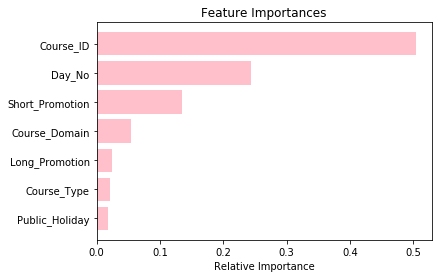

In [1763]:
plotFeatureImportances(randomForestModel)

In [1764]:
X["Course_Domain"].value_counts()

0    264295
1    166172
2     77210
3      4410
Name: Course_Domain, dtype: int64

In [1765]:
X_to_predict["Course_Domain"].value_counts()

0    18480
1    11880
2     5340
3      300
Name: Course_Domain, dtype: int64

In [1766]:
X["Course_Type"].value_counts()

0    262747
1    247576
2      1764
Name: Course_Type, dtype: int64

In [1767]:
X_to_predict["Course_Type"].value_counts()

0    18600
1    17280
2      120
Name: Course_Type, dtype: int64

In [1768]:
X_to_predict["Short_Promotion"].value_counts()

0    21600
1    14400
Name: Short_Promotion, dtype: int64

In [1769]:
X["Short_Promotion"].value_counts()

0    317369
1    194718
Name: Short_Promotion, dtype: int64

In [1770]:
X_to_predict.head(2)

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Course_Domain,Course_Type,Competition_Metric
0,0,0,0,1,0,1,0,0,0.007
1,1,1,0,1,0,1,0,0,0.007


In [1771]:
X.head()

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Course_Domain,Course_Type
0,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0
2,2,0,0,0,1,0,0
3,3,0,0,0,1,0,0
4,4,0,0,0,1,0,0


In [1772]:
print(X_to_predict.size)
print(X_test.shape)
#X_to_predict=X_to_predict.drop(['ID','Public_Holiday',],axis=1)
X_to_predict=X_to_predict.drop(['ID','Competition_Metric'],axis=1)
m_pre= rf.predict(X_to_predict)

print(X_to_predict.size)
m_pre.size

324000
(153627, 7)
252000


36000

In [1773]:
y_pred=pd.DataFrame(y_pred)
y_pred.head()

,0
0,69.0
1,75.9
2,114.4
3,213.8
4,58.7


In [1774]:
m_pre=pd.DataFrame(m_pre)
m_pre.size

36000

In [1775]:
df_t = pd.read_csv("sample_submission_pn2DrMq.csv")
df_t.shape

(36000, 2)

In [1776]:
k=df_t['ID']

blankIndex=[''] * len(k)
k.index=blankIndex
k=pd.DataFrame(k)
print(k.size)
k.head()

36000


,ID
,883
,884
,885
,886
,887


In [1777]:
m_pre=pd.DataFrame(m_pre)
m_pre.rename(columns={0:'Sales'},inplace=True)
m_pre.head()


blankIndex=[''] * len(m_pre)
m_pre.index=blankIndex

m_pre.dtypes
print(m_pre.size)
m_pre.head().astype(int)

36000


,Sales
,118
,118
,118
,118
,50


In [1778]:
print(k.shape)
print(m_pre.shape)

(36000, 1)
(36000, 1)


In [1779]:
out = pd.concat([k,m_pre.astype(int)], axis=1)
out.head()


,ID,Sales
,883,118
,884,118
,885,118
,886,118
,887,50


In [1780]:
out.to_csv('outputfile.csv', index = False)

In [1781]:
out.head()

,ID,Sales
,883,118
,884,118
,885,118
,886,118
,887,50
